In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [89]:
train = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [36]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [37]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [38]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [39]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [40]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


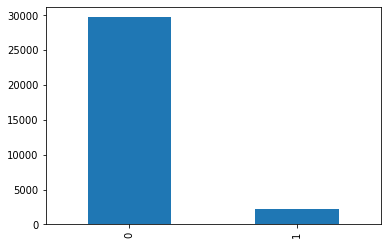

In [41]:
train['label'].value_counts().plot.bar(figsize = (6, 4))

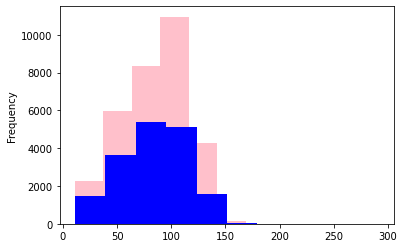

In [42]:
length_train = train['tweet'].str.len().plot.hist(color = "pink", figsize=(6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'blue', figsize = (6, 4))

In [43]:
train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()
train.head()
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

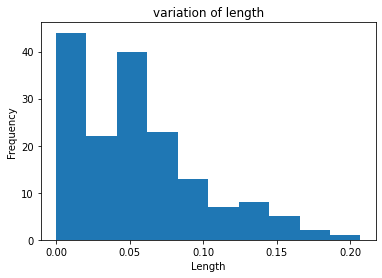

In [44]:
train.groupby('len').mean()['label'].plot.hist()
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cv = CountVectorizer(stop_words = "english")
words = cv.fit_transform(train.tweet)
sum_words = words.sum(axis = 0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x:x[1], reverse = True)

Text(0.5, 1.0, 'Frequent words')

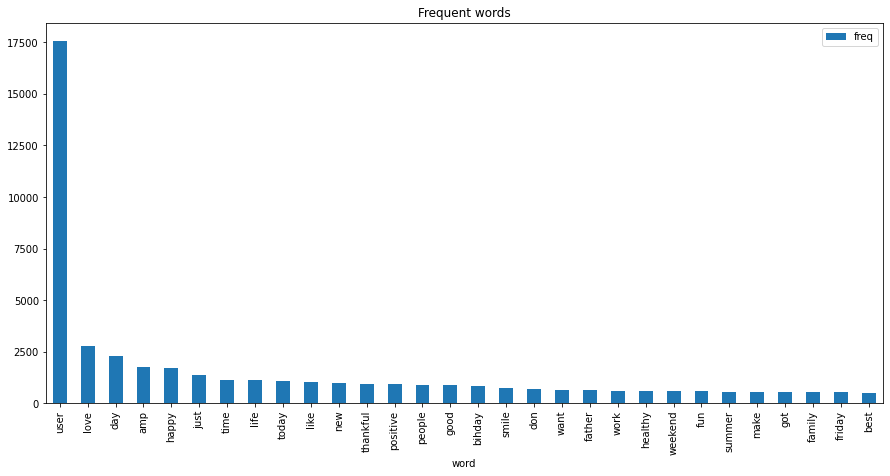

In [47]:
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.head(30).plot(x = 'word', y="freq", kind="bar", figsize=(15, 7))
plt.title("Frequent words")

Text(0.5, 1.0, 'Vocabulary from reviews')

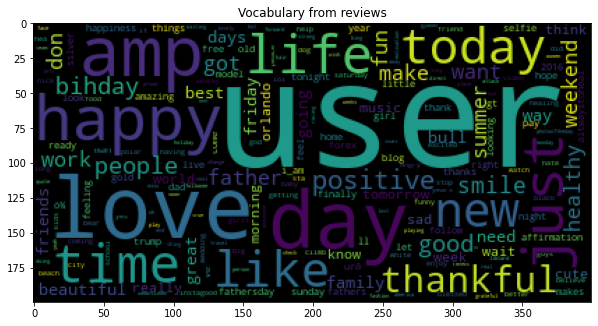

In [48]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate_from_frequencies(dict(words_freq))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.title('Vocabulary from reviews')

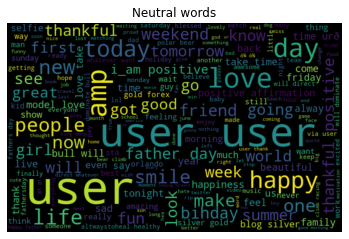

In [49]:
normal_words = ' '.join([text for text in train['tweet'][train['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=0, max_font_size = 110).generate(normal_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Neutral words')
plt.show()

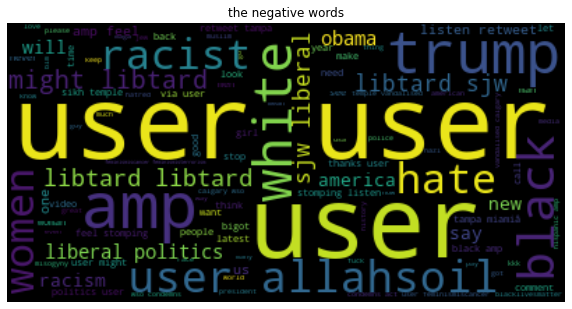

In [50]:
negative_words = ' '.join([text for text in train['tweet'][train['label'] == 1]])
wordcloud = WordCloud(random_state = 0).generate(negative_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('the negative words')
plt.show()

In [51]:
import re
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [52]:
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

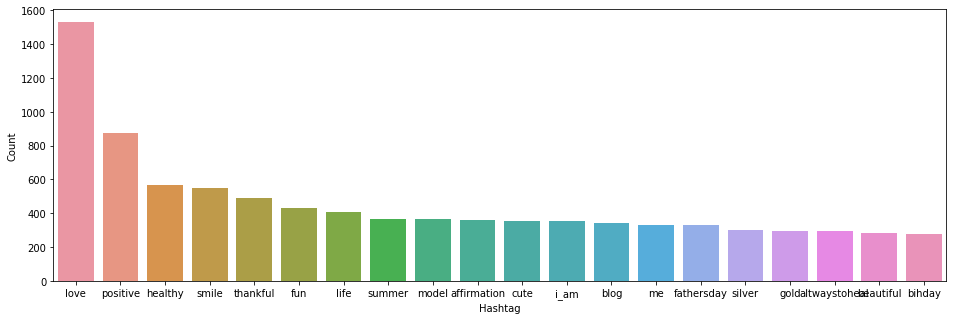

In [53]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
d = d.nlargest(columns = "Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x = "Hashtag", y = "Count")
ax.set(ylabel="Count")
plt.show()

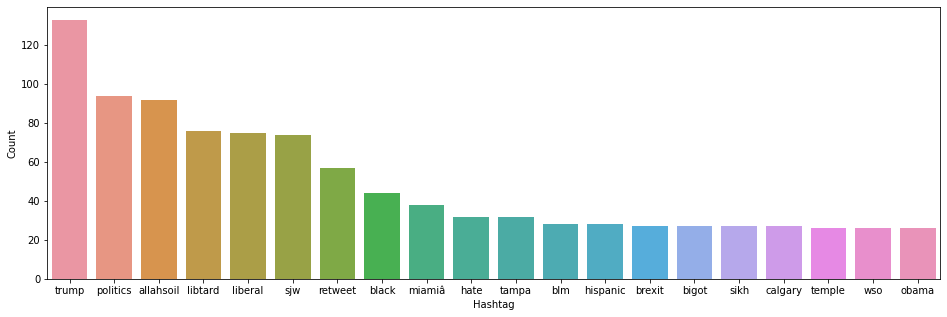

In [54]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag':list(a.keys()), 'Count': list(a.values())})
d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y ="Count")
ax.set(ylabel="Count")
plt.show()

In [55]:
import gensim #generate similar
tokenized_tweet =  train['tweet'].apply(lambda x:x.split()) #break up the strings
model_w2v = gensim.models.Word2Vec(tokenized_tweet, size=200,
                                   window=5,
                                   min_count=2,
                                   sg=1,
                                   hs=0,
                                   negative=10,
                                   workers=2,
                                   seed=34)
model_w2v.train(tokenized_tweet, total_examples = len(train['tweet']), epochs=20)


(6109617, 8411580)

In [56]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.6667361855506897),
 ('shopping!', 0.6200882196426392),
 ('#wanderlust', 0.6137809753417969),
 ('podium', 0.6062408089637756),
 ('#prosecco', 0.5977030992507935),
 ('#boardgames', 0.5946433544158936),
 ('#pamper', 0.5877379179000854),
 ('chills', 0.5871436595916748),
 ('sister!!', 0.5866549611091614),
 ('4pm', 0.5852758884429932)]

In [57]:
model_w2v.wv.most_similar(positive="apple")

[('"mytraining"', 0.7057719826698303),
 ('mytraining', 0.7055100202560425),
 ('training"', 0.6942873597145081),
 ('app,', 0.6492496728897095),
 ('ta', 0.6047300100326538),
 ('"my', 0.6029090881347656),
 ('app', 0.6021542549133301),
 ('fallen', 0.5847731828689575),
 ("others'", 0.5832774043083191),
 ("'til", 0.5809959173202515)]

In [58]:
model_w2v.wv.most_similar(positive="law")

[('weapon', 0.6729261875152588),
 ('falsely', 0.6536746025085449),
 ('guyâ\x80¦', 0.6506356000900269),
 ('scholar/prof', 0.650260865688324),
 ('pres.', 0.6499850749969482),
 ('barrack', 0.6481956839561462),
 ('hussein', 0.6467878818511963),
 ('politicizing', 0.6423792243003845),
 ('disregard', 0.6248438358306885),
 ('#guncontrolplease', 0.6174079179763794)]

In [59]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [60]:
def add_label(twt):
  output=[]
  for i, s in zip(twt.index, twt):
    output.append(LabeledSentence(s, ["tweet_" + str(i)]))
  return output

labeled_tweets = add_label(tokenized_tweet)
labeled_tweets[:6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


[LabeledSentence(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 LabeledSentence(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandn

In [63]:
nltk.download('stopwords') #stopwords
from nltk.corpus import stopwords #corpus reads the text
from nltk.stem.porter import PorterStemmer
#porter stemmer reduces different words into one

train_corpus = []
#total number of social text
for i in range(0, 31962): 
  review = re.sub('[^a-zA-Z]', '', train['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  review = ''.join(review)
  train_corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
test_corpus = []
for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', '', test['tweet'][i])
  review =  review.lower()
  review = review.split()

  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ''.join(review)
  test_corpus.append(review)

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
#scikit learn used for feature extaction (reducing the number)
#and count vectorizer is used to convert the text into vectors which acts like a list
cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [69]:
#bag of words

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)

x_test = cv.fit_transform(test_corpus).toarray()
print(x_test.shape)

(17197, 2500)


In [71]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid =  train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

#train/test is tp measure accuracy of data, 80% training, 20%testing

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#deviation as 1 and mean as 0
#normalizing the data

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [76]:
from sklearn.ensemble import RandomForestClassifier
#made of different decision trees, uses randomness to create forests with data
from sklearn.metrics import confusion_matrix
#classification algorithm
from sklearn.metrics import f1_score
#says about the precision -  false positive 

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)

print("Training accuracy: ", model.score(x_train, y_train))
print("Validation accuray: ", model.score(x_valid, y_pred))
print("F1 score:", f1_score(y_valid, y_pred))

cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training accuracy:  0.9460181052104626
Validation accuray:  1.0
F1 score: 0.22539682539682537
[[7432    0]
 [ 488   71]]


In [82]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training accuracy:", model.score(x_train, y_train))
print("Validation accuracy:",  model.score(x_valid, y_valid))

print("f1 score:",f1_score(y_valid, y_pred))

cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training accuracy: 0.9460181052104626
Validation accuracy: 0.9389312977099237
f1 score: 0.22539682539682537
[[7432    0]
 [ 488   71]]


In [84]:
from sklearn.svm import SVC
#support vector machine - support vector classifier
model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training accuracy:", model.score(x_train, y_train))
print("Validation accuracy:", model.score(x_valid, y_valid))
print("f1 score:", f1_score(y_valid, y_pred))

cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training accuracy: 0.9460181052104626
Validation accuracy: 0.9389312977099237
f1 score: 0.22539682539682537
[[7432    0]
 [ 488   71]]
